# Data Science and Business Analytics Intern at The Spark Foundation

**Task By:-Vishal Hanamant Gavali**

**Batch - May 2022**

**Task 1 - Prediction using Supervised Machine Learning**

**Using simple linear regression,we predict the percentage of an student based on no of study hours.In this regression task it involves two variables.**

**To Predict:- What will be the predicted score if a student studies for 9.25 hrs/day.**

# Importing all Necessary Libraries

In [2]:
#importing all required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import warnings as wg
wg.filterwarnings("ignore")


# Importing the given dataset

In [3]:
# Reading data from remote link
url = "http://bit.ly/w-data"
df = pd.read_csv(url)
print("Data imported successfully")  

Data imported successfully


In [4]:
#observe the dataset
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
df.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [6]:
#To find no of columns and no of rows 
df.shape

(25, 2)

In [7]:
#To find more information about given dataset
df.info

<bound method DataFrame.info of     Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86>

In [8]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [9]:
#To check if given dataset is having missing value of null values
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

As,we can see we do not have any null values in our dataset so we can now move on to our next step

# Visualizing the dataset

in this, we will plot the dataset to check whether the any relation between the given variable

Let's plot our data points on 2-D graph to eyeball our dataset and see if we can manually find any relationship between the data. We can create the plot with the following script:


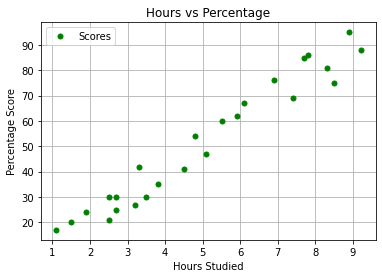

In [10]:
#plotting datasets
df.plot(x='Hours', y='Scores', style='o',color='green',markersize=5)  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score') 
plt.grid()
plt.show()

**From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.**

In [11]:
#To determine the correlaton between variables we can use .corr()
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


# Data Preparation

The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [12]:
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values

Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [13]:
#splitting the data set into training set and testing set
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0)

# Training Algorithm

In [14]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training complete.")

Training complete.


# Visualizing the model

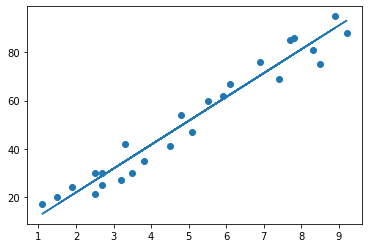

In [15]:
#Plotting the regression line 
line =regressor.coef_*X+regressor.intercept_

#Plotting from the test data
plt.scatter(X,y)
plt.plot(X,line);
plt.show()

# Making Prediction

Now that we have trained our algorithm, it's time to make some predictions.


In [16]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [17]:
y_test

array([20, 27, 69, 30, 62], dtype=int64)

In [18]:
y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [19]:
# Comparing Actual vs Predicted
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df1

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [23]:
# You can also test with your own data
hours = 9.25
pred = regressor.predict([[hours]])
print(" The student studies for 9.25 hrs/day,then the score is = {}".format(pred[0]))

 The student studies for 9.25 hrs/day,then the score is = 93.69173248737538


# Evaluating the model

we are going to evaluate our model by calculating mean absolute error

In [24]:
from sklearn import metrics
print('mean absolute error:',metrics.mean_absolute_error(y_test,y_pred))

mean absolute error: 4.183859899002975


In [25]:
from sklearn.metrics import r2_score
print("The R-square of mofel is: ",r2_score(y_test,y_pred))

The R-square of mofel is:  0.9454906892105356


# Conclusion:-

**If the student studies for 9.25 hrs/day the predicted score come out to be 93.69.**